## Model Training

##### 1.1 Import Data and Required Packages
###### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Importing the CSV Data as Panadas DataFrame

In [7]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

#### Show Top 5 Records

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Prepraing X and Y variables

In [9]:
X = df.drop(columns=['MonthlyCharges'],axis=1)

In [10]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'SeniorCitizen' variable:     ",end=" " )
print(df['SeniorCitizen'].unique())

print("Categories in 'tenure' variable:     ",end=" " )
print(df['tenure'].unique())

print("Categories in 'Contract' variable:     ",end=" " )
print(df['Contract'].unique())


Categories in 'gender' variable:      ['Female' 'Male']
Categories in 'SeniorCitizen' variable:      [0 1]
Categories in 'tenure' variable:      [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Categories in 'Contract' variable:      ['Month-to-month' 'One year' 'Two year']


In [12]:
y = df['MonthlyCharges']

In [13]:
y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [14]:
# Creating Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(7043, 13619)

In [18]:
# Separating dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5634, 13619), (1409, 13619))

##### Creating an Evaluate Function to give all metrics after model Training 

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0003
- Mean Absolute Error: 0.0002
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0512
- Mean Absolute Error: 0.7815
- R2 Score: 0.9988


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.2629
- Mean Absolute Error: 4.2595
- R2 Score: 0.9694
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1913
- Mean Absolute Error: 4.2005
- R2 Score: 0.9702


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3418
- Mean Absolute Error: 0.2600
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0502
- Mean Absolute Error: 0.7828
- R2 Score: 0.9988


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.6991
- Mean Absolute Error: 2.4032
- R2 Score: 0.9849
-----------------------

#### Results

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.998782
0,Linear Regression,0.998779
6,XGBRegressor,0.998567
5,Random Forest Regressor,0.998221
4,Decision Tree,0.997880
7,AdaBoost Regressor,0.981934
3,K-Neighbors Regressor,0.975535
1,Lasso,0.970234


#### Linear Regression

In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.88


#### Plot y_pred and y_test

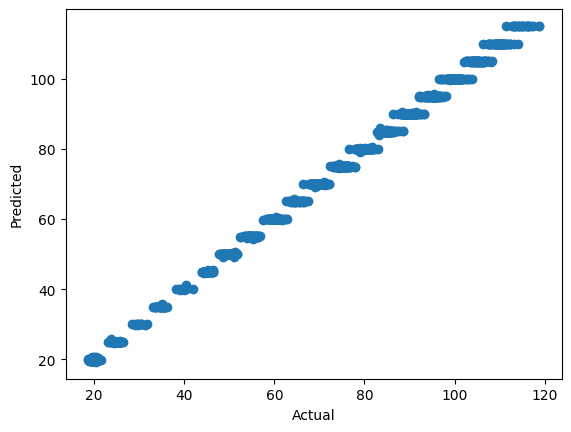

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

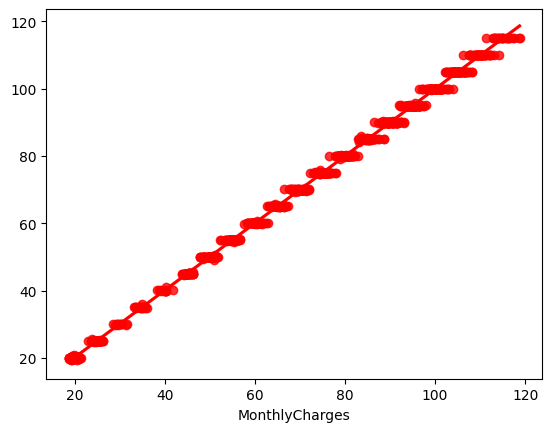

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

##### Difference between Actual and Predicate Values

In [27]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
185,24.80,24.853836,-0.053836
2715,25.25,25.018370,0.231630
3825,19.35,19.937299,-0.587299
1807,76.35,75.143677,1.206323
132,50.55,49.998204,0.551796
...,...,...,...
6366,68.30,69.940946,-1.640946
315,110.05,109.945148,0.104852
2439,19.90,19.976973,-0.076973
5002,43.95,44.949080,-0.999080


#### SUMMARY 

1. Data Import and Preparation:

 - Loaded the dataset and essential libraries.
 - Separated the target variable (MonthlyCharges) and prepared the feature matrix.

2. Feature Engineering:

 - Applied one-hot encoding to categorical features and standard scaling to numerical features using a ColumnTransformer.

3. Train-Test Split:

 - Split the dataset into training and testing sets.

4. Model Selection and Training:

 - Considered various regression models: Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, K-Nearest Neighbors, SVR, AdaBoost, and XGBoost.
 - Used randomized search for hyperparameter tuning.

5. Model Evaluation:

 - Evaluated models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.
 - Selected the best-performing model based on these metrics.

Conclusion

The optimized model, chosen for its superior predictive accuracy, is now ready to predict customer churn, aiding in proactive retention strategies.